In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import os
os.getcwd()

'/Users/shikharaikhare/Documents/Data_Mining/Project'

In [3]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


### SMART QUESTION 3: 

#### How does the product category relate to sales performance, and can this insight inform inventory stocking?

##### Check the unique product categories in the dataset

In [7]:
print(df['Category Name'].unique())

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']


In [8]:
category_count = df['Category Name'].nunique()

In [9]:
print(category_count)

50


##### Group the data by product category and calculate total sales for each category

In [10]:
category_sales = df.groupby('Category Name')['Sales'].sum().reset_index()

In [11]:
category_sales

,Category Name,Sales
0,Accessories,1.336715e+05
1,As Seen on TV!,2.059794e+04
2,Baby,1.222956e+04
3,Baseball & Softball,9.405715e+04
4,Basketball,2.709933e+04
5,Books,1.258740e+04
6,Boxing & MMA,8.520541e+04
7,CDs,3.059590e+03
8,Cameras,2.676077e+05
9,Camping & Hiking,4.118426e+06


##### Sort the categories by total sales in descending order

In [12]:
category_sales = category_sales.sort_values(by = 'Sales', ascending = False)

In [13]:
category_sales

,Category Name,Sales
18,Fishing,6.929654e+06
12,Cleats,4.431943e+06
9,Camping & Hiking,4.118426e+06
10,Cardio Equipment,3.694843e+06
47,Women's Apparel,3.147800e+06
46,Water Sports,3.113845e+06
34,Men's Footwear,2.891758e+06
30,Indoor/Outdoor Games,2.888994e+06
38,Shop By Sport,1.309522e+06
13,Computers,6.630000e+05


#### Visualize the Relationship b/w Sales and Category Name

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79645/1669151994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Category Name', data=category_sales, palette="viridis")


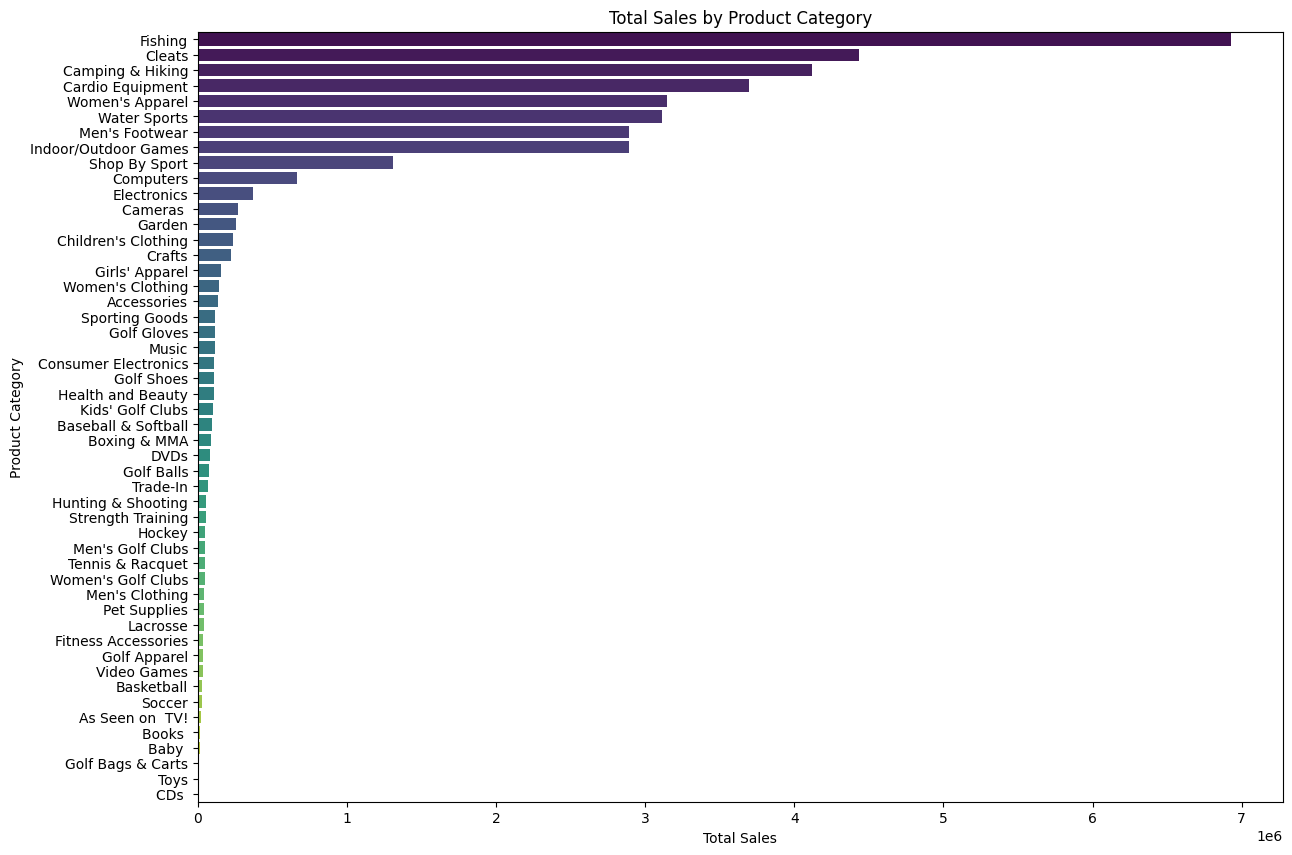

In [14]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='Category Name', data=category_sales, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Total Sales by Product Category')
plt.show()

In [15]:
# let's analyze in percentage

In [16]:
total_sales = category_sales['Sales'].sum()

In [17]:
category_sales['Sales Percentage'] = (category_sales['Sales'] / total_sales) * 100
category_sales = category_sales.sort_values(by='Sales Percentage', ascending=False)

In [18]:
category_sales

,Category Name,Sales,Sales Percentage
18,Fishing,6.929654e+06,18.838395
12,Cleats,4.431943e+06,12.048321
9,Camping & Hiking,4.118426e+06,11.196018
10,Cardio Equipment,3.694843e+06,10.044501
47,Women's Apparel,3.147800e+06,8.557354
46,Water Sports,3.113845e+06,8.465046
34,Men's Footwear,2.891758e+06,7.861298
30,Indoor/Outdoor Games,2.888994e+06,7.853785
38,Shop By Sport,1.309522e+06,3.559961
13,Computers,6.630000e+05,1.802378


/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79645/500503846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Percentage', y='Category Name', data=category_sales, palette="viridis")


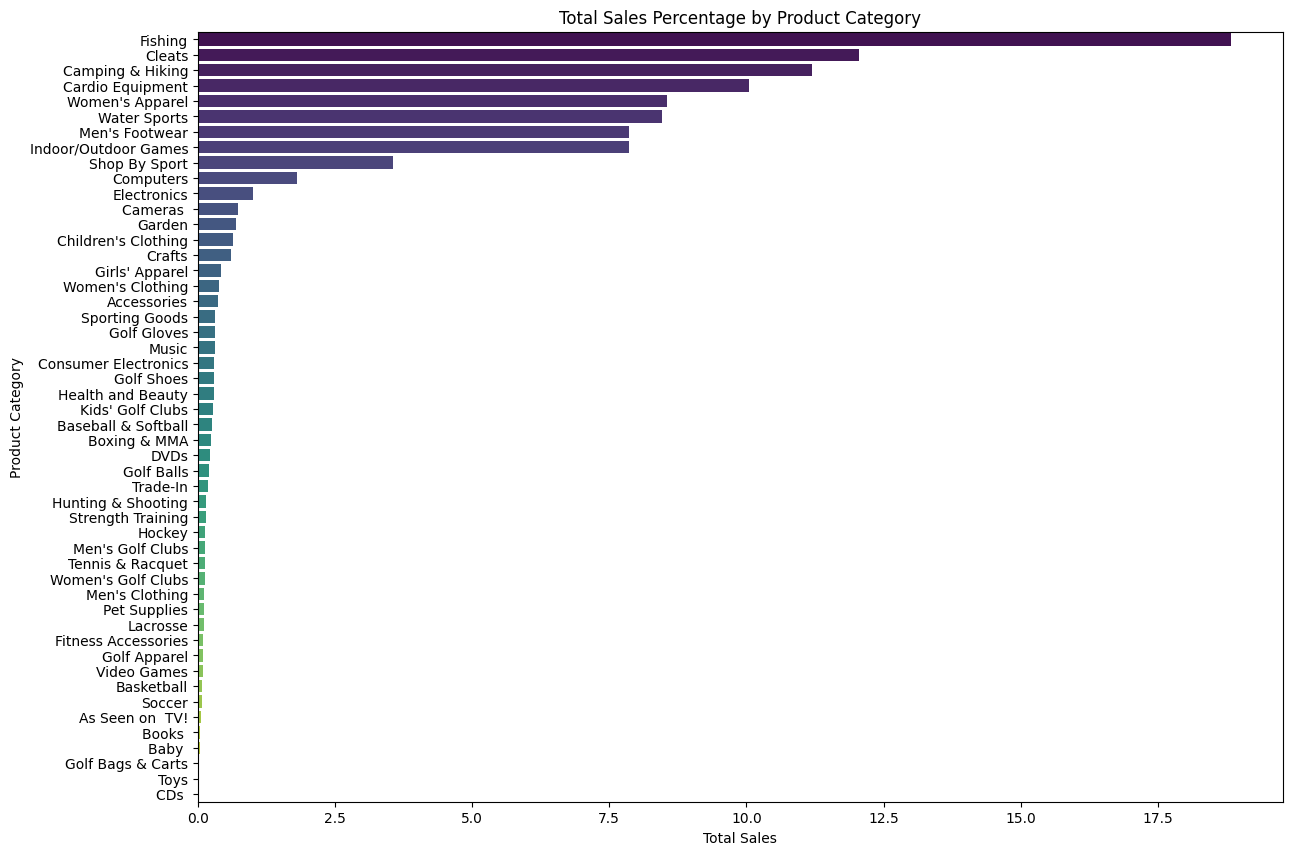

In [38]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales Percentage', y='Category Name', data=category_sales, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Total Sales Percentage by Product Category')
plt.show()

In [20]:
# Select relevant columns for clustering
columns_for_clustering = [  # Primary metric of interest
    'Category Name',  # The product category
    ]

In [21]:
# Subset the data
subset_df = df[columns_for_clustering]

# Apply one-hot encoding to the 'Category Name' column
subset_df = pd.get_dummies(subset_df, columns=['Category Name'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

Text(0, 0.5, '')

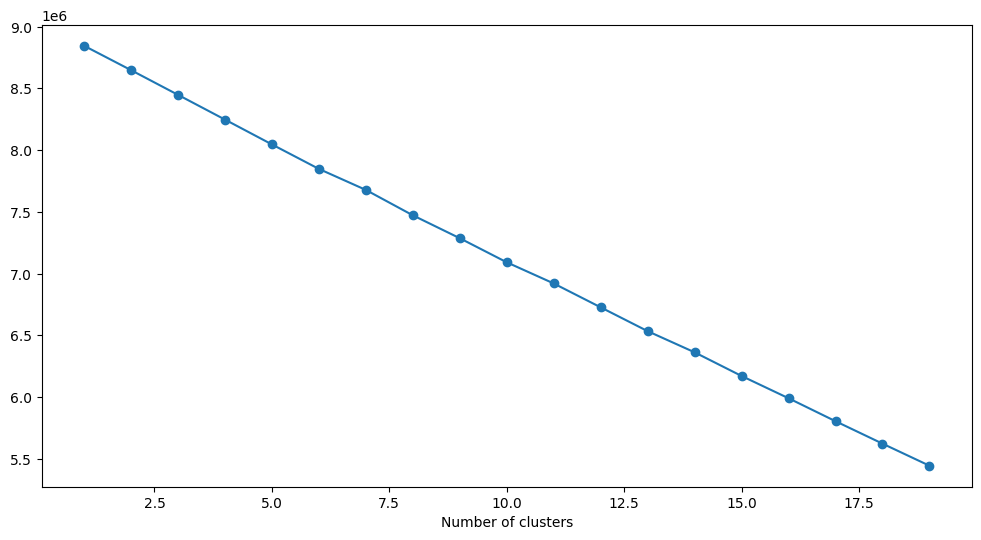

In [23]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('')

When you encounter a straight-line elbow curve, it may be necessary to consider other methods or criteria for determining the number of clusters, such as the Silhouette score.

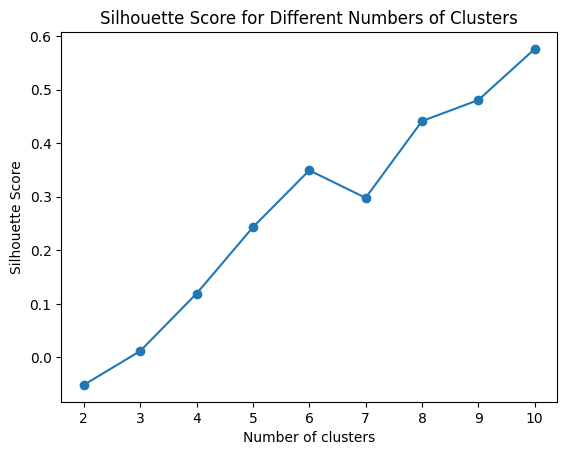

In [24]:
# Determine the optimal number of clusters using the Silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


In [25]:
# Choose the number of clusters with the highest Silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because we started from k=2
print(f'Optimal number of clusters: {optimal_num_clusters}')

Optimal number of clusters: 10


In [26]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
df['Cluster_Silhouette'] = cluster_labels

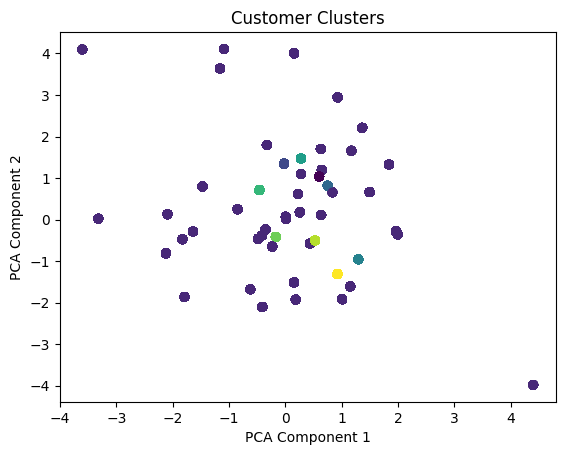

In [30]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_data)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Cluster_Silhouette'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters')
plt.show()

We can perform an Analysis of Variance (ANOVA) test to determine if there are significant differences in sales performance among different product categories.

In [49]:
grouped_data = [df['Sales'][df['Category Name'] == category] for category in df['Category Name'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Determine if the p-value is statistically significant (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("There are significant differences in sales performance among different product categories.")
else:
    print("There are no significant differences in sales performance among different product categories.")

F-statistic: 10891.848342349987
p-value: 0.0
There are significant differences in sales performance among different product categories.


We the same behaviour from the above barplots for Sales performance.

#### Segment Analysis:

In [50]:
# Group data by 'Category Name' and 'Customer Segment' and calculate the total sales for each combination
category_segment_sales = df.groupby(['Category Name', 'Customer Segment'])['Sales'].sum().reset_index()

# Pivot the table to have 'Category Name' as columns and 'Customer Segment' as rows
pivot_table = category_segment_sales.pivot(index='Customer Segment', columns='Category Name', values='Sales')

# Fill any missing values (NaN) with 0
pivot_table = pivot_table.fillna(0)

# Print the pivot table
print(pivot_table)

Category Name      Accessories  As Seen on  TV!        Baby   \
Customer Segment                                               
Consumer          69572.159371      9699.029984  6321.560196   
Corporate         39384.239653      6299.370018  4253.760132   
Home Office       24715.109801      4599.539963  1654.240051   

Category Name     Baseball & Softball    Basketball       Books   \
Customer Segment                                                   
Consumer                 50795.321371  13799.679686  5563.319986   
Corporate                26614.980724   7799.809814  4009.319990   
Home Office              16646.850448   5499.839843  3014.759992   

Category Name     Boxing & MMA         CDs        Cameras   Camping & Hiking  \
Customer Segment                                                               
Consumer          44845.210526  1693.499994  145104.842728      2.112759e+06   
Corporate         25380.620308   937.069997   71422.321343      1.263816e+06   
Home Office       

<Figure size 1400x1000 with 0 Axes>

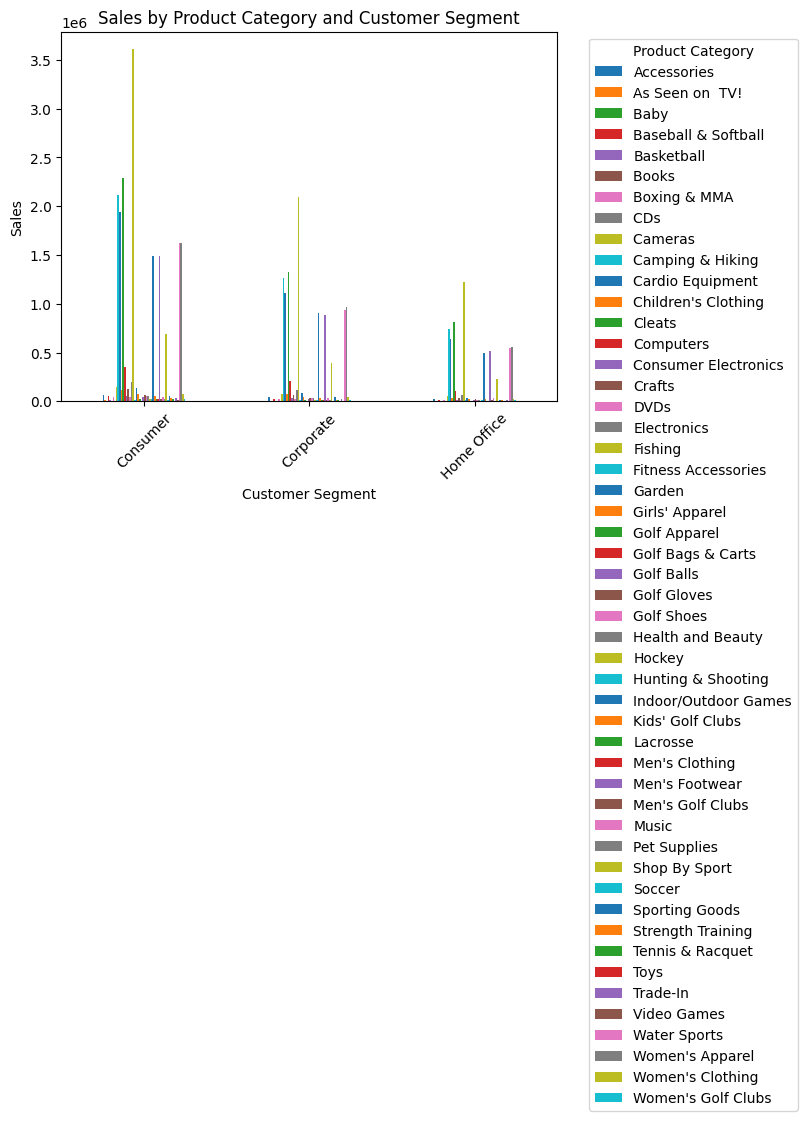

In [58]:
plt.figure(figsize=(14, 10))

pivot_table.plot(kind='bar', stacked=False)
plt.title("Sales by Product Category and Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [71]:
for segment in pivot_table.columns:
    top_categories = pivot_table[segment].nlargest(5).index
    top_categories_by_segment[segment] = top_categories

# Print the top 5 product categories for each customer segment
for segment in pivot_table.columns:
    print(f"Top 5 Product Categories for {segment}:")
    print(top_categories_by_segment[segment])
    print()

Top 5 Product Categories for Accessories:
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for As Seen on  TV!:
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for Baby :
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for Baseball & Softball:
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for Basketball:
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for Books :
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for Boxing & MMA:
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Customer Segment')

Top 5 Product Categories for CDs :
Index(['Consumer', 'Corporate', 'Home Of